In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



# datos clima

<AxesSubplot:xlabel='valor'>

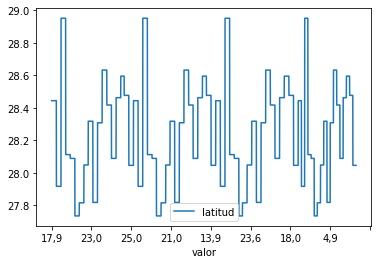

In [2]:
datosClimaDiarios = "../../../datos/CM05/datosClimaDiarios_.csv"
datosClimaDiarios_dt = pd.read_csv(datosClimaDiarios)
datosClimaDiarios_dt.plot(x='valor',y='latitud')

In [3]:
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'tmin']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'tmax']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'prec']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'sol']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'velmedia']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'presMax']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'presMin']
print(datosClimaDiarios_dt.describe())

            latitud      longitud          anyo           mes           dia  \
count  23899.000000  23899.000000  23899.000000  23899.000000  23899.000000   
mean      28.239203    -16.031765   2018.382903      6.194276     15.643332   
std        0.317791      1.222160      1.074181      3.358493      8.817867   
min       27.735833    -17.915278   2017.000000      1.000000      1.000000   
25%       28.046944    -16.561111   2017.000000      3.000000      8.000000   
50%       28.308889    -16.329444   2018.000000      6.000000     16.000000   
75%       28.463333    -15.416111   2019.000000      9.000000     23.000000   
max       28.951944    -13.600278   2020.000000     12.000000     31.000000   

       ultima_fecha  
count       23899.0  
mean     20200910.0  
std             0.0  
min      20200910.0  
25%      20200910.0  
50%      20200910.0  
75%      20200910.0  
max      20200910.0  


# Datos Aeropuertos

In [4]:
maestro_cm05_20150101_20151231 = "../../../datos/CM05/maestro_cm05_20150101_20151231.csv"
maestro_cm05_20150101_20151231_dt = pd.read_csv(maestro_cm05_20150101_20151231)
maestro_cm05_20150101_20151231_dt.head()

,indicador,estacion,nombre,provincia,latitud,longitud,anyo,mes,dia,valor
0,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,17.9
1,tmin,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,16.8
2,tmax,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,19.0
3,prec,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,0.0
4,velmedia,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,4.7


In [5]:
listAllAmountFiles = glob.glob('../../../datos/CM05/maestro_cm05_*.csv')
combined_amount_dt = pd.concat([pd.read_csv(f) for f in listAllAmountFiles ])
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'tmin']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'tmax']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'prec']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'sol']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'velmedia']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'presMax']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'presMin']

print(combined_amount_dt.describe())

            latitud      longitud          anyo           mes           dia  \
count  43874.000000  43874.000000  43874.000000  43874.000000  43874.000000   
mean      28.251516    -15.995855   2017.752245      6.303779     15.720746   
std        0.337691      1.246200      1.927627      3.415322      8.799826   
min       27.735833    -17.915278   2015.000000      1.000000      1.000000   
25%       28.046944    -16.561111   2016.000000      3.000000      8.000000   
50%       28.308889    -16.255278   2018.000000      6.000000     16.000000   
75%       28.463333    -15.416111   2019.000000      9.000000     23.000000   
max       29.231944    -13.501944   2021.000000     12.000000     31.000000   

              valor  
count  42135.000000  
mean      20.559110  
std        4.082303  
min       -4.000000  
25%       18.600000  
50%       20.800000  
75%       23.400000  
max       35.300000  


In [6]:
combined_amount_dt.head()

,indicador,estacion,nombre,provincia,latitud,longitud,anyo,mes,dia,valor
0,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,1,18.9
8,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,2,18.8
16,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,3,18.6
24,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,4,15.8
32,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,5,15.4


<AxesSubplot:xlabel='valor', ylabel='latitud'>

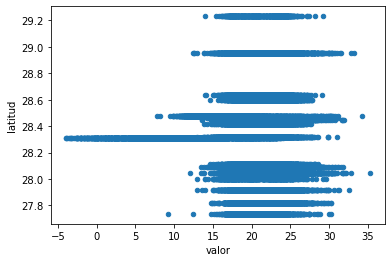

In [30]:
combined_amount_dt.plot.scatter(x='valor',y='latitud')

,indicador,estacion,nombre,provincia,latitud,longitud,anyo,mes,dia,valor,valorPrev,ultima_fecha
0,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,1,"17,9",NaN,20200910
8,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,2,"18,2",NaN,20200910
16,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,3,"19,2",NaN,20200910
24,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,4,"17,4",NaN,20200910
32,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,5,"16,7",NaN,20200910


ValueError: could not convert string to float: '17,9'

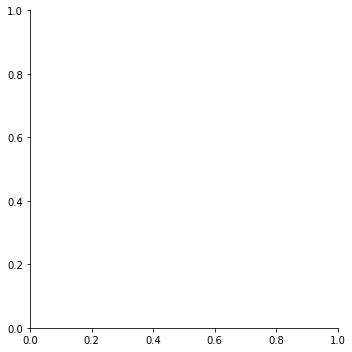